In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


C:\Users\CADIT-IDN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\CADIT-IDN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\CADIT-IDN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

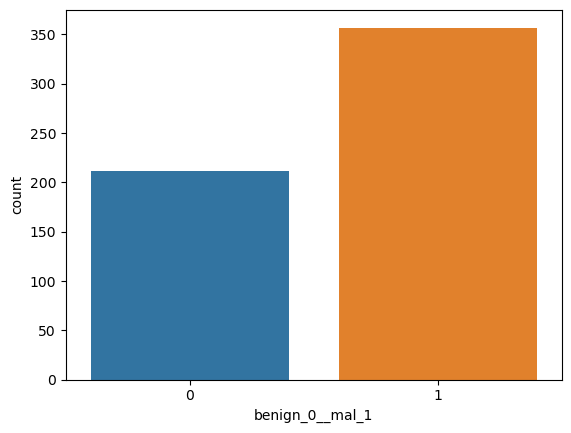

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

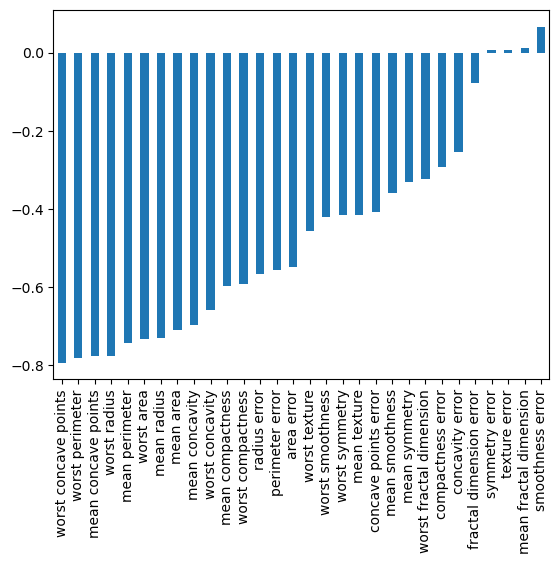

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

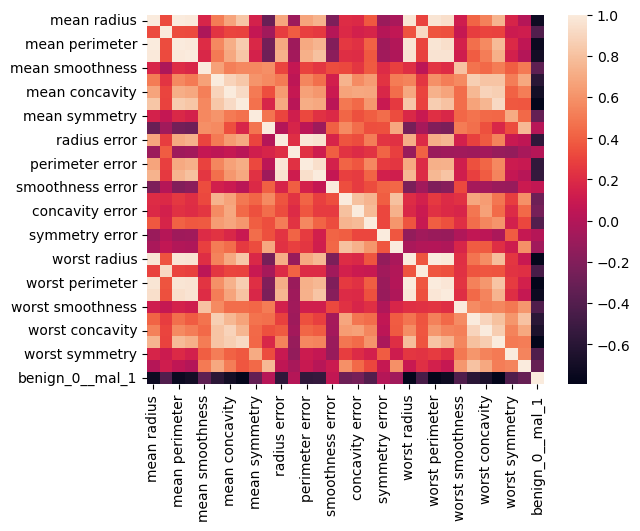

In [13]:
sns.heatmap(df.corr())

In [16]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Dropout

In [26]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [31]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 2s 26ms/step - loss: 0.6543 - val_loss: 0.6370
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6148 - val_loss: 0.5952
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5725 - val_loss: 0.5473
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5200 - val_loss: 0.4922
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4673 - val_loss: 0.4384
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4176 - val_loss: 0.3879
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3730 - val_loss: 0.3445
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3361 - val_loss: 0.3087
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3028 - val_loss: 0.2795
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2750 - val_loss: 0.2531
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0558 - val_loss: 0.1294
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0551 - val_loss: 0.1175
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0543 - val_loss: 0.1272
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0539 - val_loss: 0.1231
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0521 - val_loss: 0.1210
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0523 - val_loss: 0.1207
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0518 - val_loss: 0.1220
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0537 - val_loss: 0.1167
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0522 - val_loss: 0.1228
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0529 - val_loss: 0.1248

14/14 [==============================] - 0s 5ms/step - loss: 0.0426 - val_loss: 0.1349
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0422 - val_loss: 0.1373
Epoch 166/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0409 - val_loss: 0.1350
Epoch 167/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0413 - val_loss: 0.1350
Epoch 168/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0413 - val_loss: 0.1364
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0431 - val_loss: 0.1331
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0411 - val_loss: 0.1322
Epoch 171/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0405 - val_loss: 0.1512
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0421 - val_loss: 0.1322
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0432 - val_loss: 0.1422
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0394 - val_loss: 0.1329
Epoch 246/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0328 - val_loss: 0.1488
Epoch 247/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0334 - val_loss: 0.1436
Epoch 248/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0402 - val_loss: 0.1366
Epoch 249/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0366 - val_loss: 0.1447
Epoch 250/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0332 - val_loss: 0.1436
Epoch 251/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0315 - val_loss: 0.1364
Epoch 252/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0327 - val_loss: 0.1363
Epoch 253/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0349 - val_loss: 0.1696
Epoch 254/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0391 - val_loss: 0.1317
Ep

14/14 [==============================] - 0s 8ms/step - loss: 0.0245 - val_loss: 0.1468
Epoch 327/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0246 - val_loss: 0.1412
Epoch 328/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0249 - val_loss: 0.1376
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0243 - val_loss: 0.1431
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0271 - val_loss: 0.1650
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0245 - val_loss: 0.1371
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.1704
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0240 - val_loss: 0.1404
Epoch 334/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0268 - val_loss: 0.1477
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0260 - val_loss: 0.1658
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0194 - val_loss: 0.1371
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0254 - val_loss: 0.1820
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.1649
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: 0.1666
Epoch 411/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0163 - val_loss: 0.1577
Epoch 412/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.1581
Epoch 413/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0155 - val_loss: 0.1637
Epoch 414/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0190 - val_loss: 0.1538
Epoch 415/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0216 - val_loss: 0.1573
Epoch 416/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0166 - val_loss: 0.1634
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.1638
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.1477
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.1935
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0100 - val_loss: 0.1606
Epoch 492/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.1847
Epoch 493/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.1508
Epoch 494/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.1844
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0110 - val_loss: 0.1481
Epoch 496/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0089 - val_loss: 0.1799
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.1609
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.1728
Epoch 570/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0058 - val_loss: 0.1886
Epoch 571/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.1796
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.1820
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.1953
Epoch 574/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 0.1709
Epoch 575/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.2016
Epoch 576/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.1911
Epoch 577/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0048 - val_loss: 0.1667
Epoch 578/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.2067
Epo

In [32]:
losses = pd.DataFrame(model.history.history)

In [33]:
losses

,loss,val_loss
0,0.654309,0.636960
1,0.614839,0.595242
2,0.572549,0.547307
3,0.519980,0.492230
4,0.467271,0.438416
...,...,...
595,0.004333,0.181519
596,0.003970,0.195286
597,0.004575,0.193186
598,0.003866,0.184125


<Axes: >

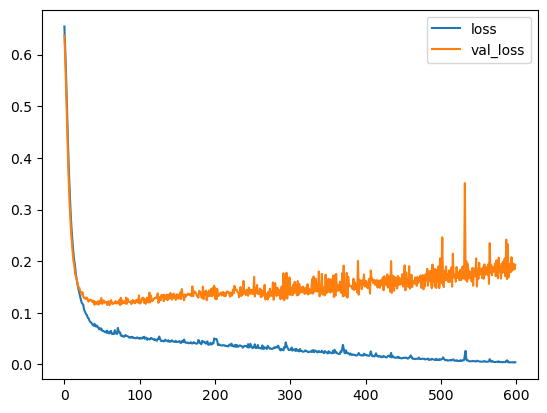

In [34]:
losses.plot()

In [35]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.6827 - val_loss: 0.6617
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6507 - val_loss: 0.6306
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6138 - val_loss: 0.5913
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5709 - val_loss: 0.5446
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5178 - val_loss: 0.4877
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4604 - val_loss: 0.4281
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4043 - val_loss: 0.3677
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3538 - val_loss: 0.3209
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3095 - val_loss: 0.2809
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2765 - val_loss: 0.2479
Epoch 11

Epoch 82: early stopping


In [39]:
losses = pd.DataFrame(model.history.history)

<Axes: >

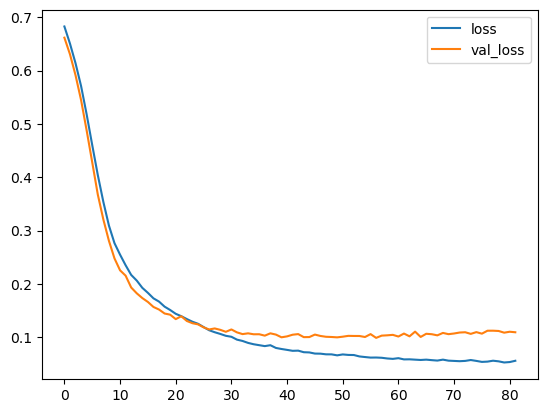

In [40]:
losses.plot()

In [56]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [57]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.7245 - val_loss: 0.7090
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7099 - val_loss: 0.6835
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6797 - val_loss: 0.6635
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6684 - val_loss: 0.6463
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6494 - val_loss: 0.6273
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6309 - val_loss: 0.6060
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6243 - val_loss: 0.5834
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5917 - val_loss: 0.5545
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5799 - val_loss: 0.5265
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5403 - val_loss: 0.4980
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1501 - val_loss: 0.1143
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1252 - val_loss: 0.0915
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1500 - val_loss: 0.0896
Epoch 86/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1216 - val_loss: 0.1102
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1255 - val_loss: 0.0906
Epoch 88/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1438 - val_loss: 0.0896
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1236 - val_loss: 0.0956
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1306 - val_loss: 0.0933
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1292 - val_loss: 0.0914
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1341 - val_loss: 0.0930


<Axes: >

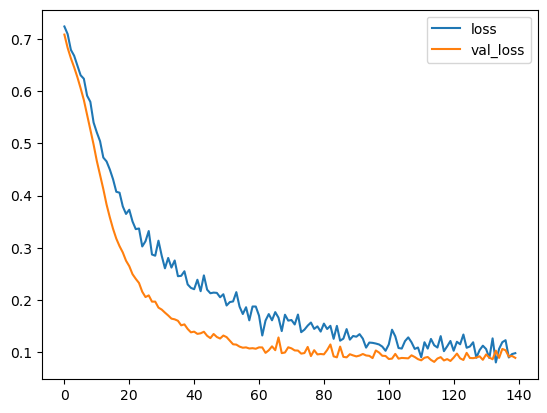

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [60]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [61]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [64]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
